# Conclusion re dates for plant 1:
- The dates were messed up for June when setting index to the date_time col:
    - date jun 1st (6/1) is being read as Jan 6th (1/6)
    - date jun 2nd (6/2) is being read as Feb 6th (2/6)
- It imported the dates incorrectly. So I fixed it by adding a param when setting the index.

#### Fixed this. let's try below to see if it imports correctly now

----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
p1_gen = pd.read_csv('../../data/p1_gen_dtindex.csv', index_col=0, parse_dates=True)

p1_gen.sort_index(inplace = True)

In [3]:
p1_gen

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0


# Isolating inverter 1BY6WEcLGh8j5v7 
## as sk1

In [4]:
sk1 = p1_gen[p1_gen.SOURCE_KEY == '1BY6WEcLGh8j5v7']
sk1

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 00:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 00:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 00:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 01:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
...,...,...,...,...,...,...
2020-06-17 22:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
2020-06-17 23:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
2020-06-17 23:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0


---

## MAY

- May has the following days of data:
    - 5/6, & 5/15 - 5/31

In [8]:
sk1_may = sk1[sk1.index.month == 5]
sk1_may.groupby(sk1_may.index.day).sum()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,
15,384555093,235340.696429,23046.550595,245624.232144,5.823846e+08
16,363880088,256629.875001,25124.491072,297475.732142,5.516450e+08
17,396960096,288039.821438,28172.850000,333411.428572,6.024075e+08
18,396960096,204030.303569,19970.507143,218056.660714,6.029685e+08
19,384555093,232277.267856,22741.176786,287097.035714,5.846657e+08
20,314260076,230412.619037,22516.258332,239838.845237,4.782864e+08
21,268775065,288676.601200,28223.132737,342311.029761,4.097354e+08
22,396960096,280809.071423,27456.633929,322188.446430,6.056578e+08
23,368015089,326468.267851,31922.930357,362559.755951,5.621686e+08


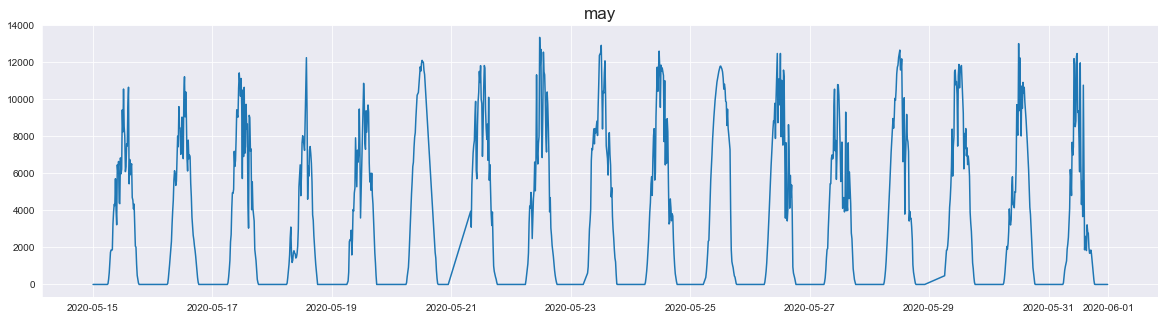

In [9]:
# MAY

plt.figure(figsize = (20,5))
plt.plot(sk1_may['DC_POWER'])
plt.title('may', fontsize = 17);

---

## Jun

- June has 6 days of data:
    - 6/6, & 6/13 - 6/17

In [10]:
sk1_jun = sk1[sk1.index.month == 6]
sk1_jun.groupby(sk1_jun.index.day).sum()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,
1,396960096,225219.773800,22033.249405,277036.755953,6.125576e+08
2,396960096,286633.750002,28043.889286,330140.160714,6.131403e+08
3,392825095,287069.374999,28085.882143,328479.982141,6.074229e+08
4,396960096,309653.821420,30287.019644,346658.321426,6.145353e+08
5,396960096,293353.250011,28693.905357,327663.464286,6.152432e+08
6,396960096,243297.178577,23793.423214,291599.553570,6.158947e+08
7,396960096,217217.714279,21247.576786,251279.803571,6.164256e+08
8,396960096,316710.851181,30969.720833,366860.107144,6.170461e+08
9,396960096,301395.464285,29476.869642,349768.553571,6.177837e+08


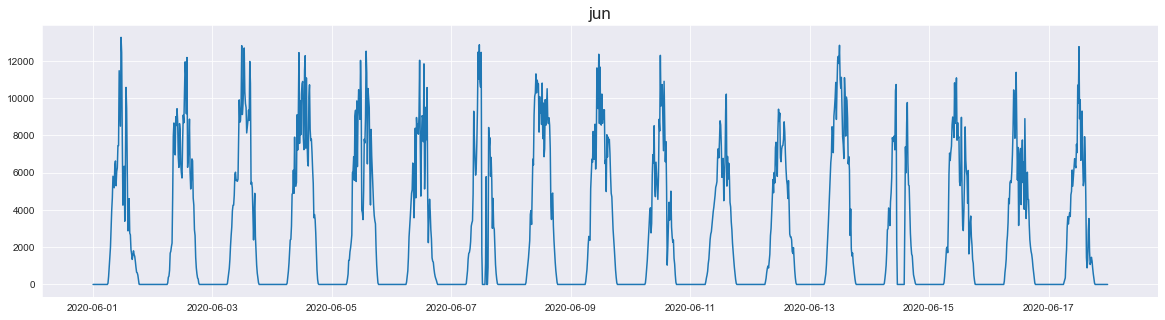

In [11]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(sk1_jun.DC_POWER)
ax.set_title('jun', fontsize = 17);